In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance', con=engine)
engine.dispose()

In [4]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
0 in df['math score']

True

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

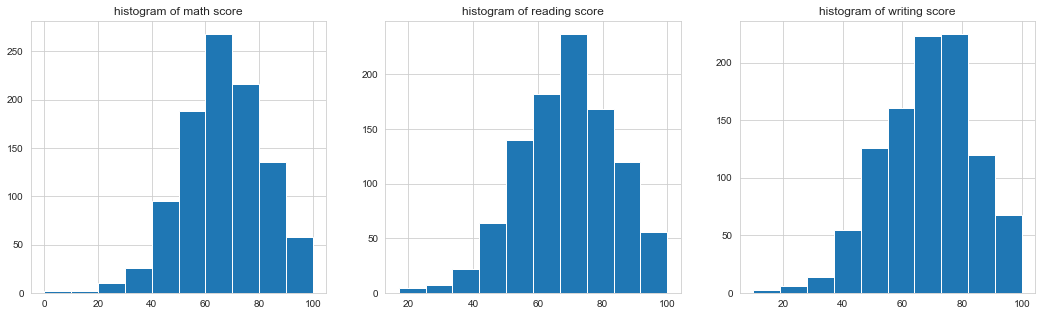

In [6]:
plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(df['math score'])
plt.title('histogram of math score')

plt.subplot(132)
plt.hist(df['reading score'])
plt.title('histogram of reading score')

plt.subplot(133)
plt.hist(df['writing score'])
plt.title('histogram of writing score')

plt.show()

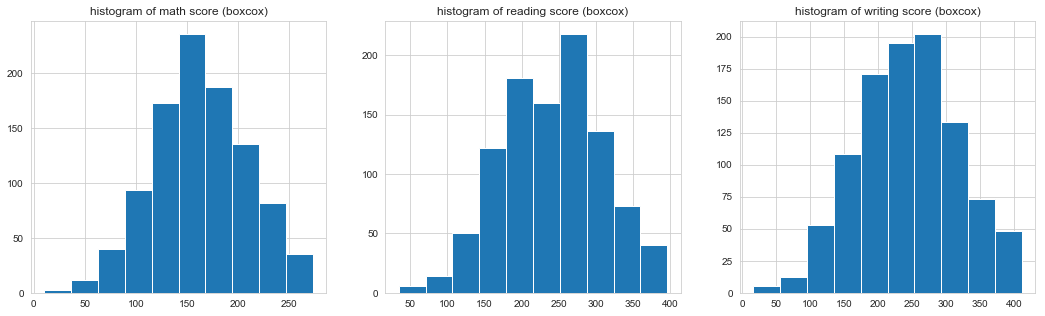

In [12]:
from scipy.stats import boxcox

bc_math,_ = boxcox(df[df['math score'] >0]['math score']) 
bc_reading,_ = boxcox(df['reading score'])
bc_writing,_ = boxcox(df['writing score'])

plt.figure(figsize=(18,5))

plt.subplot(131)
plt.hist(bc_math)
plt.title('histogram of math score (boxcox)')

plt.subplot(132)
plt.hist(bc_reading)
plt.title('histogram of reading score (boxcox)')

plt.subplot(133)
plt.hist(bc_writing)
plt.title('histogram of writing score (boxcox)')

plt.show()

They don't look normally distributed. Jarque_Bera is going to be employed to verify their distributions.

In [15]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb = jarque_bera(df['math score'])
norm = normaltest(df['math score'])
print('jarque_bera test statistics is {0} and p value is {1}'.format(jb[0], jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(norm[0], norm[1]))

jb = jarque_bera(df['reading score'])
norm = normaltest(df['reading score'])
print('jarque_bera test statistics is {0} and p value is {1}'.format(jb[0], jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(norm[0], norm[1]))

jb = jarque_bera(df['writing score'])
norm = normaltest(df['writing score'])
print('jarque_bera test statistics is {0} and p value is {1}'.format(jb[0], jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(norm[0], norm[1]))

print('-------------------------------------------------------------------------')

jb = jarque_bera(bc_math)
norm = normaltest(bc_math)
print('jarque_bera test statistics is {0} and p value is {1}'.format(jb[0], jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(norm[0], norm[1]))

jb = jarque_bera(bc_reading)
norm = normaltest(bc_reading)
print('jarque_bera test statistics is {0} and p value is {1}'.format(jb[0], jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(norm[0], norm[1]))

jb = jarque_bera(bc_writing)
norm = normaltest(bc_writing)
print('jarque_bera test statistics is {0} and p value is {1}'.format(jb[0], jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(norm[0], norm[1]))

jarque_bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
normal test statistics is 15.408960513931822 and p value is 0.00045080293869937836
jarque_bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
normal test statistics is 11.11741279628622 and p value is 0.003853758403576582
jarque_bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
normal test statistics is 13.606450837263859 and p value is 0.0011101885439899974
-------------------------------------------------------------------------
jarque_bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
normal test statistics is 1.8323073377495822 and p value is 0.40005482895717037
jarque_bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
normal test statistics is 5.282274611852865 and p value is 0.07128015609575467
jarque_bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
normal test 

After Box-Cox transformation is applied, the distributions come closer to the normal distribution shape. The Jarque-Bera also indicates that transformed variables are all normally distributed with 5% significant level.


### Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

jarque_bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
normal test statistics is 15.186721327231322 and p value is 0.0005037851534494478


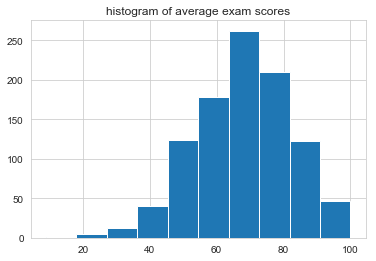

In [16]:
target_score = (df['math score'] + df['reading score'] + df['writing score'])/3
plt.hist(target_score)
plt.title('histogram of average exam scores')

# testing for normal distribution using JB and normal tests
jb = jarque_bera(target_score)
norm = normaltest(target_score)

print('jarque_bera test statistics is {0} and p value is {1}'.format(jb[0], jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(norm[0], norm[1]))

The new variable is not normall distributed. Box-Cox transformation will be applied.

jarque_bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
normal test statistics is 2.779857245981238 and p value is 0.2490930835165177


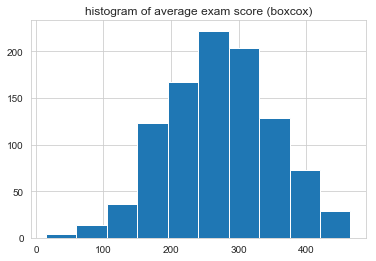

In [17]:
bc_target_score,_ = boxcox(target_score)
plt.hist(bc_target_score)
plt.title('histogram of average exam score (boxcox)')

jb = jarque_bera(bc_target_score)
norm = normaltest(bc_target_score)

print('jarque_bera test statistics is {0} and p value is {1}'.format(jb[0], jb[1]))
print('normal test statistics is {0} and p value is {1}'.format(norm[0], norm[1]))

After Box-Cox transformed, the new variable is now normally distributed and confirmed by Jarque-Bera and Normal tests.


### Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

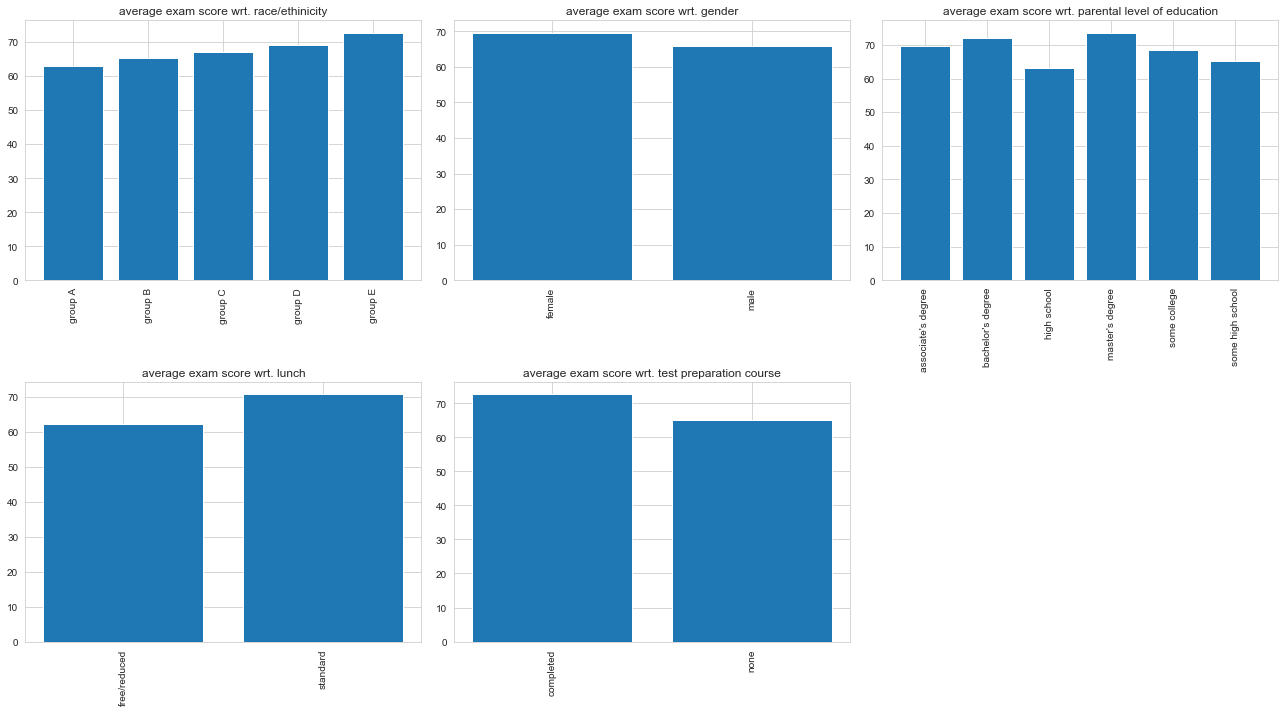

In [23]:
df['target_score'] = target_score

plt.figure(figsize=(18,10))

plt.subplot(231)
plt.bar(df.groupby('race/ethnicity')['target_score'].mean().index, df.groupby('race/ethnicity')['target_score'].mean())
plt.title('average exam score wrt. race/ethinicity')
plt.xticks(rotation='vertical')

plt.subplot(232)
plt.bar(df.groupby('gender')['target_score'].mean().index, df.groupby('gender')['target_score'].mean())
plt.title('average exam score wrt. gender')
plt.xticks(rotation='vertical')

plt.subplot(233)
plt.bar(df.groupby('parental level of education')['target_score'].mean().index, df.groupby('parental level of education')['target_score'].mean())
plt.title('average exam score wrt. parental level of education')
plt.xticks(rotation='vertical')

plt.subplot(234)
plt.bar(df.groupby('lunch')['target_score'].mean().index, df.groupby('lunch')['target_score'].mean())
plt.title('average exam score wrt. lunch')
plt.xticks(rotation='vertical')

plt.subplot(235)
plt.bar(df.groupby('test preparation course')['target_score'].mean().index, df.groupby('test preparation course')['target_score'].mean())
plt.title('average exam score wrt. test preparation course')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

1. Average exam score increases from group A to E. Race/ethinicity may play an important role in explaining the successes in exams.
2. Female students seem to do better on exams than their counterhalves.
3. There are variations between the parental levels of education with respect to the exam scores.
4. Lunch types also exhibit variance in the exam scores. There is probably another factor that affects both the lunch types and the exam scores. 
5. Students who completed the test preparation scores seem to do better on exams that those who didn't.

Any variables could be used in explaining students' successes in exams but tread carefull with the lunch one. 